# Análise inicial dos dados

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc = {'figure.figsize' : (20, 5)})

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


# Importação dos dados para análise
raw_data = pd.read_csv('data/archive.zip', 
                       sep = ',',
                       decimal = ',')

raw_data.head() # Exibe  as primeiras linhas do dataframe

date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1  2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2  2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3  2017-03-10 01:00:00         55.2          16.98      3047.36     568.665   
4  2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  ...  Flotation Column 07 Air Flow  \
0                       253.235  ...                       250.884   
1                       250.532  ...                       248.994   
2                       247.874  ...                       248.071   
3                       254.487  ...                       251.147   
4                       252.136  ...                       248.928   

   Flotation Column 01 Level  Flotation Column 02 Level  \
0                    457.396                    432.962   
1                    451.891                    429.560   
2                    451.240                    468.927   
3                    452.441                    458.165   
4                    452.441                    452.900   

   Flotation Column 03 Level  Flotation Column 04 Level  \
0                    424.954                    443.558   
1                    432.939                    448.086   
2                    434.610                    449.688   
3                    442.865                    446.210   
4                    450.523                    453.670   

   Flotation Column 05 Level  Flotation Column 06 Level  \
0                    502.255                    446.370   
1                    496.363                    445.922   
2                    484.411                    447.826   
3                    471.411                    437.690   
4                    462.598                    443.682   

   Flotation Column 07 Level  % Iron Concentrate  % Silica Concentrate  
0                    523.344               66.91                  1.31  
1                    498.075               66.91                  1.31  
2                    458.567               66.91                  1.31  
3                    427.669               66.91                  1.31  
4                    425.679               66.91                  1.31  

[5 rows x 24 columns]

In [2]:
raw_data.shape # Número de linhas e colunas do dataframe

(737453, 24)

In [3]:
raw_data.describe().transpose() # Exploração inicial do comportamento dos dados

count         mean          std         min  \
% Iron Feed                   737453.0    56.294739     5.157744   42.740000   
% Silica Feed                 737453.0    14.651716     6.807439    1.310000   
Starch Flow                   737453.0  2869.140569  1215.203734    0.002026   
Amina Flow                    737453.0   488.144697    91.230534  241.669000   
Ore Pulp Flow                 737453.0   397.578372     9.699785  376.249000   
Ore Pulp pH                   737453.0     9.767639     0.387007    8.753340   
Ore Pulp Density              737453.0     1.680380     0.069249    1.519820   
Flotation Column 01 Air Flow  737453.0   280.151856    29.621288  175.510000   
Flotation Column 02 Air Flow  737453.0   277.159965    30.149357  175.156000   
Flotation Column 03 Air Flow  737453.0   281.082397    28.558268  176.469000   
Flotation Column 04 Air Flow  737453.0   299.447794     2.572538  292.195000   
Flotation Column 05 Air Flow  737453.0   299.917814     3.636579  286.295000   
Flotation Column 06 Air Flow  737453.0   292.071485    30.217804  189.928000   
Flotation Column 07 Air Flow  737453.0   290.754856    28.670105  185.962000   
Flotation Column 01 Level     737453.0   520.244823   131.014924  149.218000   
Flotation Column 02 Level     737453.0   522.649555   128.165050  210.752000   
Flotation Column 03 Level     737453.0   531.352662   150.842164  126.255000   
Flotation Column 04 Level     737453.0   420.320973    91.794432  162.201000   
Flotation Column 05 Level     737453.0   425.251706    84.535822  166.991000   
Flotation Column 06 Level     737453.0   429.941018    89.862225  155.841000   
Flotation Column 07 Level     737453.0   421.021231    84.891491  175.349000   
% Iron Concentrate            737453.0    65.050068     1.118645   62.050000   
% Silica Concentrate          737453.0     2.326763     1.125554    0.600000   

                                      25%          50%          75%  \
% Iron Feed                     52.670000    56.080000    59.720000   
% Silica Feed                    8.940000    13.850000    19.600000   
Starch Flow                   2076.320000  3018.430000  3727.730000   
Amina Flow                     431.796000   504.393000   553.257000   
Ore Pulp Flow                  394.264000   399.249000   402.968000   
Ore Pulp pH                      9.527360     9.798100    10.038000   
Ore Pulp Density                 1.647310     1.697600     1.728330   
Flotation Column 01 Air Flow   250.281000   299.344000   300.149000   
Flotation Column 02 Air Flow   250.457000   296.223000   300.690000   
Flotation Column 03 Air Flow   250.855000   298.696000   300.382000   
Flotation Column 04 Air Flow   298.262566   299.805000   300.638000   
Flotation Column 05 Air Flow   298.068000   299.887120   301.791137   
Flotation Column 06 Air Flow   262.541000   299.477000   303.061000   
Flotation Column 07 Air Flow   256.302000   299.011000   301.904000   
Flotation Column 01 Level      416.978000   491.878000   594.114000   
Flotation Column 02 Level      441.883000   495.956000   595.464000   
Flotation Column 03 Level      411.325000   494.318000   601.249000   
Flotation Column 04 Level      356.679000   411.974000   485.549000   
Flotation Column 05 Level      357.653000   408.773000   484.329000   
Flotation Column 06 Level      358.497000   424.664575   492.684000   
Flotation Column 07 Level      356.772000   411.065000   476.465000   
% Iron Concentrate              64.370000    65.210000    65.860000   
% Silica Concentrate             1.440000     2.000000     3.010000   

                                     max  
% Iron Feed                     65.78000  
% Silica Feed                   33.40000  
Starch Flow                   6300.23000  
Amina Flow                     739.53800  
Ore Pulp Flow                  418.64100  
Ore Pulp pH                     10.80810  
Ore Pulp Density                 1.85325  
Flotation Column 01 Air Flow   373.87100  
Flotation Column 02 

In [4]:
raw_data.isnull().sum() # Validação da existência de dados nulos

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [5]:
raw_data.groupby(raw_data['date']).count() # Agrupamento para entendimento do comportamento dos dados

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00          174            174          174         174   
2017-03-10 02:00:00          180            180          180         180   
2017-03-10 03:00:00          180            180          180         180   
2017-03-10 04:00:00          180            180          180         180   
2017-03-10 05:00:00          180            180          180         180   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00          180            180          180         180   
2017-09-09 20:00:00          180            180          180         180   
2017-09-09 21:00:00          180            180          180         180   
2017-09-09 22:00:00          180            180          180         180   
2017-09-09 23:00:00          180            180          180         180   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00            174          174               174   
2017-03-10 02:00:00            180          180               180   
2017-03-10 03:00:00            180          180               180   
2017-03-10 04:00:00            180          180               180   
2017-03-10 05:00:00            180          180               180   
...                            ...          ...               ...   
2017-09-09 19:00:00            180          180               180   
2017-09-09 20:00:00            180          180               180   
2017-09-09 21:00:00            180          180               180   
2017-09-09 22:00:00            180          180               180   
2017-09-09 23:00:00            180          180               180   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                           174   
2017-03-10 02:00:00                           180   
2017-03-10 03:00:00                           180   
2017-03-10 04:00:00                           180   
2017-03-10 05:00:00                           180   
...                                           ...   
2017-09-09 19:00:00                           180   
2017-09-09 20:00:00                           180   
2017-09-09 21:00:00                           180   
2017-09-09 22:00:00                           180   
2017-09-09 23:00:00                           180   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                           174   
2017-03-10 02:00:00                           180   
2017-03-10 03:00:00                           180   
2017-03-10 04:00:00                           180   
2017-03-10 05:00:00                           180   
...                                           ...   
2017-09-09 19:00:00                           180   
2017-09-09 20:00:00                           180   
2017-09-09 21:00:00                           180   
2017-09-09 22:00:00                           180   
2017-09-09 23:00:00                           180   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                           174  ...   
2017-03-10 02:00:00                           180  ...   
2017-03-10 03:00:00                           180  ...   
2017-03-10 04:00:00                           180  ...   
2017-03-10 05:00:00                           180  ...   
...                                           ...  ...   
2017-09-09 19:00:00                           180  ...   
2017-09-09 20:00:00                           180  ...   
2017-09-09 21:00:00                           180  ...   
2017-09-09 22:00:00                           180  ...   
2017-09-09 23:00:00                           180  ...   


In [6]:
(raw_data.drop('date', axis = 'columns').diff() != 0).sum() # Avaliação da frequência de atualização dos dados

% Iron Feed                        307
% Silica Feed                      306
Starch Flow                     729203
Amina Flow                      727488
Ore Pulp Flow                   732400
Ore Pulp pH                     713041
Ore Pulp Density                715814
Flotation Column 01 Air Flow    698973
Flotation Column 02 Air Flow    730617
Flotation Column 03 Air Flow    708892
Flotation Column 04 Air Flow    636351
Flotation Column 05 Air Flow    645548
Flotation Column 06 Air Flow    705541
Flotation Column 07 Air Flow    717706
Flotation Column 01 Level       723840
Flotation Column 02 Level       731636
Flotation Column 03 Level       730954
Flotation Column 04 Level       734148
Flotation Column 05 Level       731895
Flotation Column 06 Level       733526
Flotation Column 07 Level       732756
% Iron Concentrate               42308
% Silica Concentrate             59141
dtype: int64

In [7]:
# Avaliando a frequência com que a medida de sílica no concentrado é alterada 
concentrate_changes = raw_data[['% Silica Concentrate', '% Iron Concentrate']].diff() != 0
concentrate_changes_index = concentrate_changes[concentrate_changes['% Silica Concentrate'] == True].index
concentrate_changes_index = concentrate_changes_index.to_series()
concentrate_changes_index

0              0
174          174
354          354
534          534
714          714
           ...  
736553    736553
736733    736733
736913    736913
737093    737093
737273    737273
Length: 59141, dtype: int64

In [8]:
concentrate_changes_index.diff().describe() # Avaliação do comportamento da diferença entre os pontos

count    59140.000000
mean        12.466571
std         86.988746
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      13140.000000
dtype: float64

In [9]:
np.sum([concentrate_changes_index.diff() == 1]) # Existem 55.800 pontos nos quais varia de 20 em 20 s

55800

In [10]:
55800*20/3600 # Total de horas em que houve variação a cada ponto de dados

310.0

In [11]:
concentrate_changes_index.diff()[concentrate_changes_index.diff() != 1].describe() 
# Ignorando os pontos nos quais há diferença a cada 20s, podemos ver uma tendência de mudança na concentração a cada 180 pontos (180*20/3600 = 1 hora)

count     3340.000000
mean       204.033832
std        308.412163
min        174.000000
25%        180.000000
50%        180.000000
75%        180.000000
max      13140.000000
dtype: float64

# Avaliação do comportamento operacional

<Axes: >

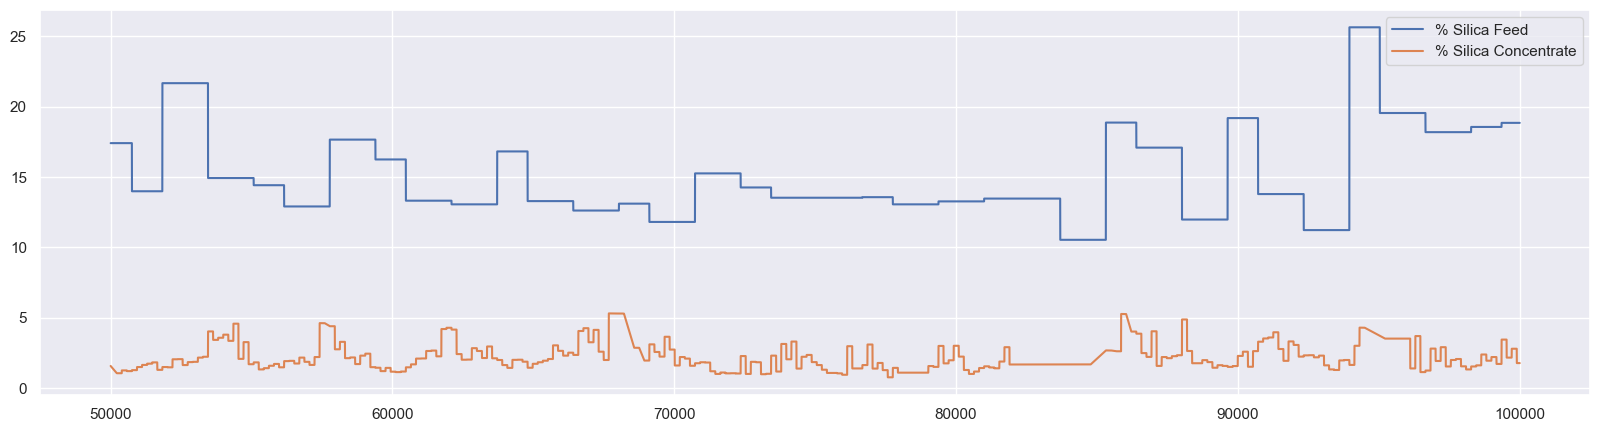

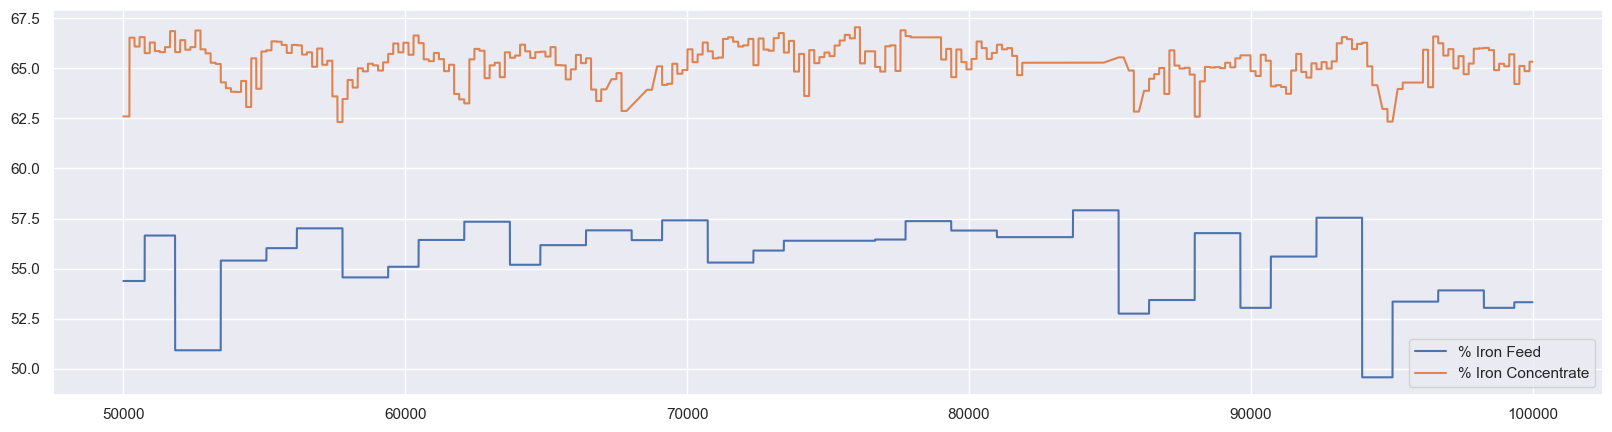

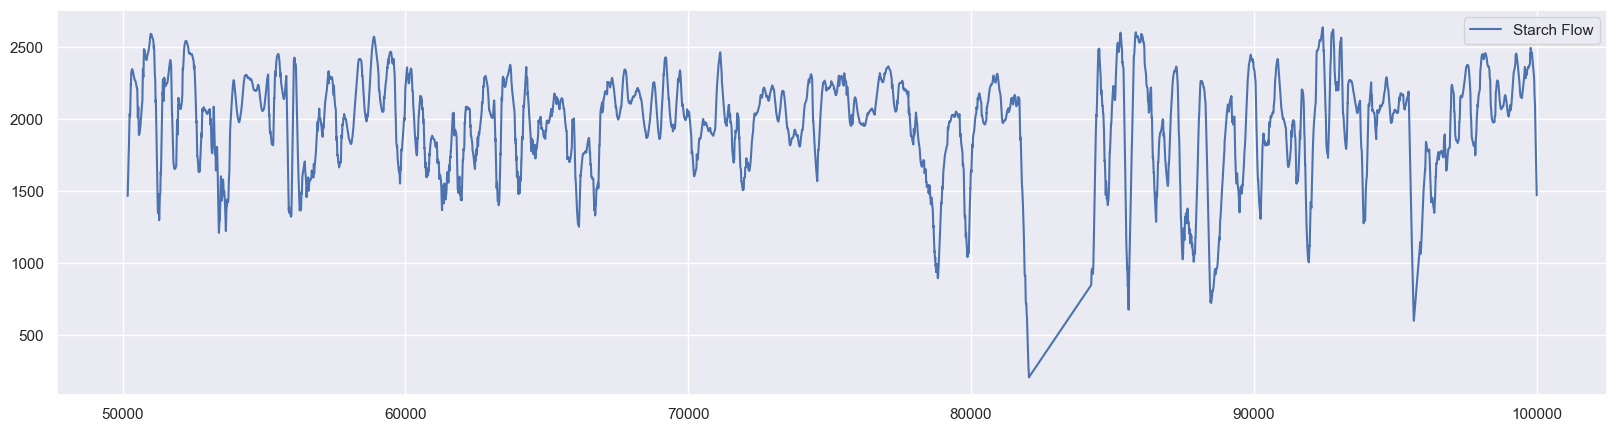

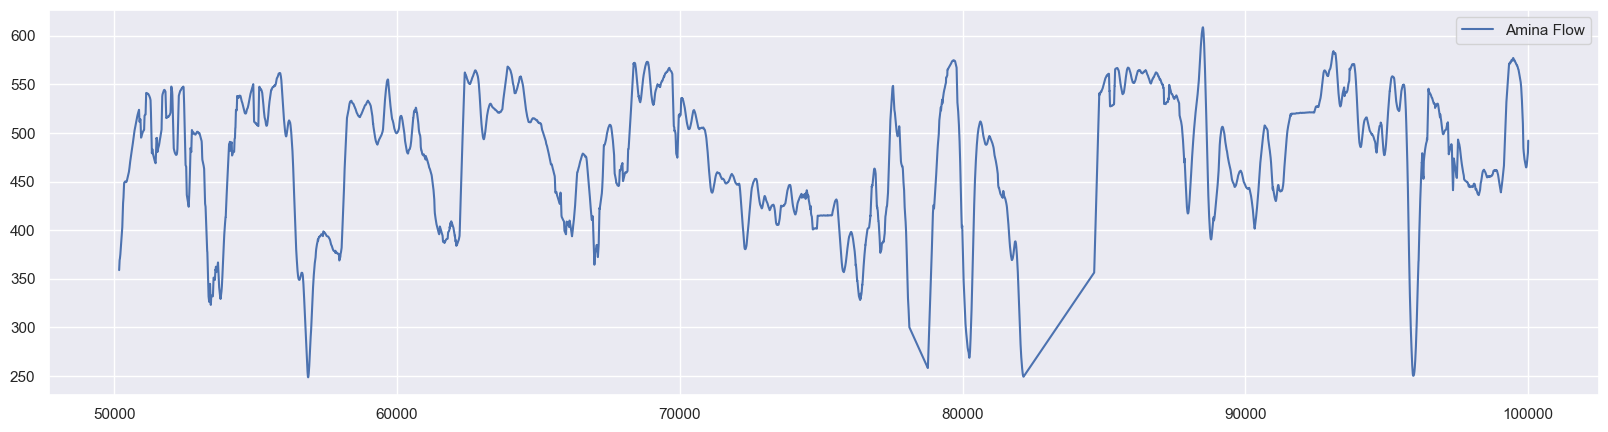

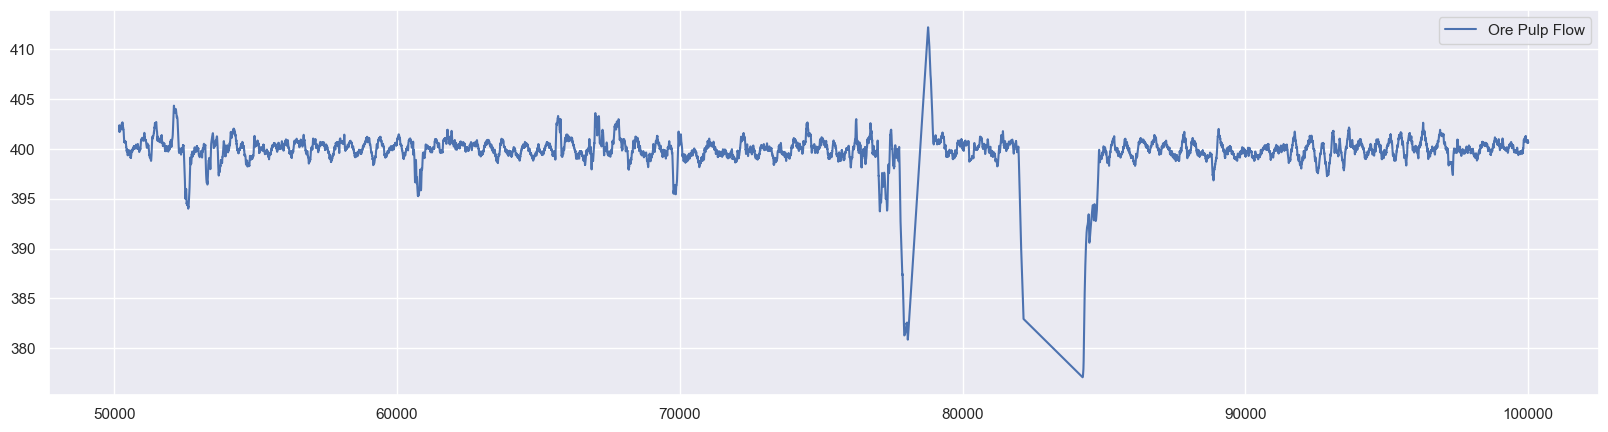

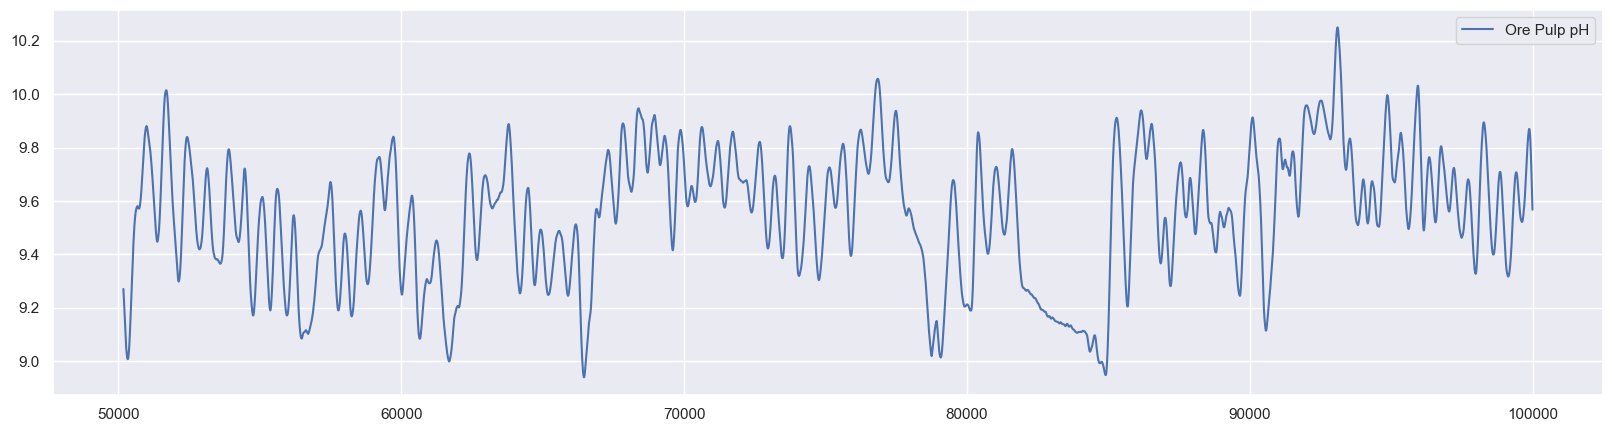

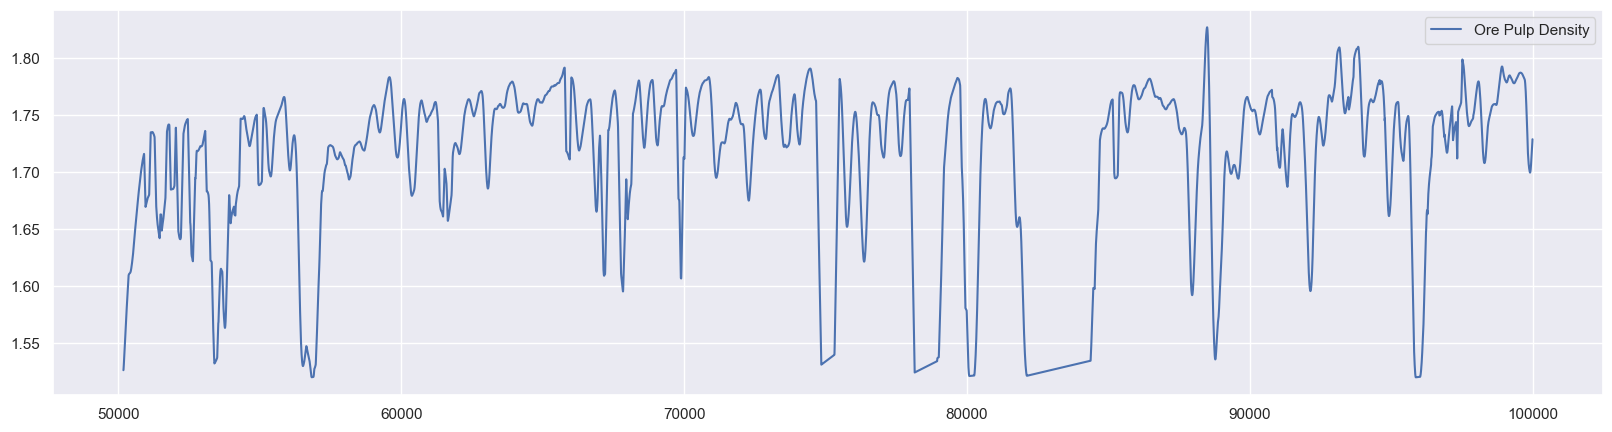

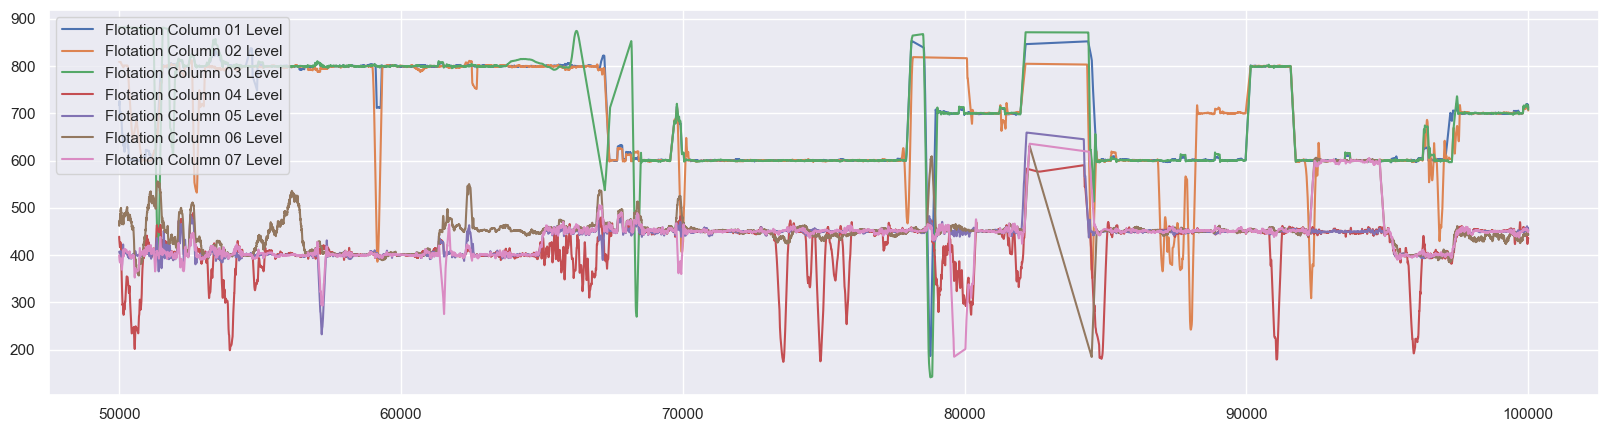

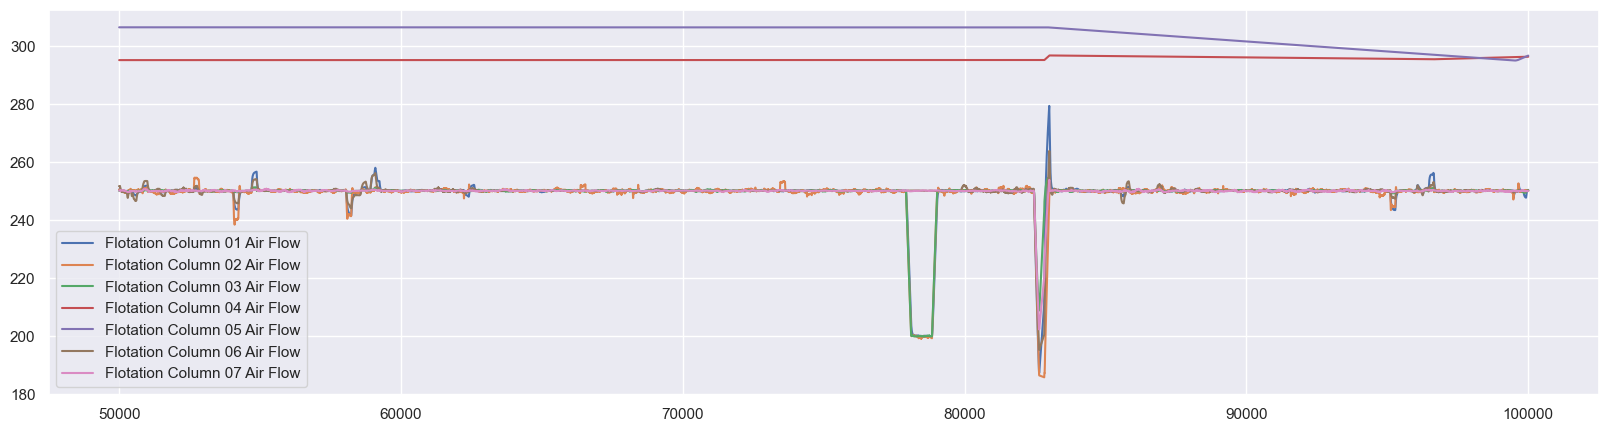

In [12]:
# Visualização gráfica das variáveis na amostragem original
start = 50000 # Início da janela (índice bruto)
end = 100000 # Fim da janela (índice bruto)
rolling_time = 3*60 # Número de pontos para execução de média móvel no intuito de facilitar a visualização dos dados online

raw_data[['% Silica Feed', '% Silica Concentrate']].iloc[start:end].plot()
raw_data[['% Iron Feed', '% Iron Concentrate']].iloc[start:end].plot()
raw_data[['Starch Flow']].iloc[start:end].rolling(rolling_time).mean().plot()
raw_data[['Amina Flow']].iloc[start:end].rolling(rolling_time).mean().plot()
raw_data[['Ore Pulp Flow']].iloc[start:end].rolling(rolling_time).mean().plot()
raw_data[['Ore Pulp pH']].iloc[start:end].rolling(rolling_time).mean().plot()
raw_data[['Ore Pulp Density']].iloc[start:end].rolling(rolling_time).mean().plot()
raw_data[[col for col in raw_data.columns if 'Level' in col]].rolling(rolling_time).mean().iloc[start:end].plot()
raw_data[[col for col in raw_data.columns if 'Air Flow' in col]].rolling(rolling_time).mean().iloc[start:end].plot()

# Filtragem e preparação dos dados

In [13]:
def create_filter_stuck_interp(data, vars, num_points, discrete = False):
    """
    Função para criar um filtro que retorna True para períodos em que a variável se comporta normalmente e False para momentos 
    em que a variável fica travada por um número de pontos maior que num_points ou que aparenta estar interpolada (variação linear constante)

    data : df
        Dataframe com os dados brutos
    vars : [str]
        Colunas do dataframe a serem utilizadas para criação do filtro
    num_points : int
        Número de pontos (tempo) para se considerar uma variável travada
    discrete : bool
        Indica se a variável é discreta (degraus) ou contínua 
    """
    changes = abs(data[vars] - data[vars].shift()) > 1e-12 # Identifica pontos nos quais houve mudança

    time_since_last_change = changes.mul(changes.index, axis = 0) # Utiliza o índice do dataframe para calcular quanto tempo se passou desde a última mudança
    time_since_last_change = time_since_last_change.replace(0, np.nan)
    time_since_last_change = time_since_last_change.ffill()
    time_since_last_change = time_since_last_change.fillna(0)
    time_since_last_change = abs(time_since_last_change.sub(time_since_last_change.index, axis = 0))

    filter = time_since_last_change < num_points # Remove pontos travados por mais de num_points

    if discrete == True:
        linear_variations = (time_since_last_change - time_since_last_change.shift()) == 0 # Identifica sequências de variações lineares (interpolações)
        filter[linear_variations == True] = False # Remove interpolações
    else:
        first_derivative = abs(data[vars] - data[vars].shift())
        second_derivative = abs(first_derivative - first_derivative.shift())
        mean_second_derivative = second_derivative.rolling(num_points).mean()
        linear_variations = mean_second_derivative < 1e-6 # Identifica interpolações em dados contínuos usando a segunda derivada muito próxima de zero
        filter[linear_variations == True] = False # Remove interpolações

    return filter

In [14]:
# Separação das variáveis conforme comportamento, para aplicação de filtros distintos
datetime_vars = ['date'] # Variável data/hora
online_vars = [column_name for column_name in raw_data.columns if ('%' not in column_name and 'date' not in column_name)] # Variáveis de amostragem "online", a cada 20s
feed_vars = [column_name for column_name in raw_data.columns if 'Feed' in column_name] # Concentrações da polpa, período irregular
concentrate_vars = [column_name for column_name in raw_data.columns if 'Concentrate' in column_name] # Concentrações do concentrado, a cada hora majoritariamente

In [15]:
concentrate_filter = create_filter_stuck_interp(raw_data, concentrate_vars, 3*60*8, discrete = True) # Filtro para concentração de saída considerando 1 turno travado (tentativa e erro)
feed_filter = create_filter_stuck_interp(raw_data, feed_vars, 3*60*16, discrete = True) # Filtro para concentração de entrada considerando 2 turnos travados (tentativa e erro)
online_filter = create_filter_stuck_interp(raw_data, online_vars, 3*60) # Filtro para variáveis online, considerando 1h travado

In [16]:
concentrate_filter.sum()/raw_data.shape[0] # % de dados restantes para o análises laboratoriais do concentrado

% Iron Concentrate      0.899438
% Silica Concentrate    0.878202
dtype: float64

In [17]:
feed_filter.sum()/raw_data.shape[0] # % de dados restantes para o análises laboratoriais da alimentação

% Iron Feed      0.644616
% Silica Feed    0.644616
dtype: float64

In [18]:
online_filter.sum()/raw_data.shape[0] # % de dados restantes para variáveis online

Starch Flow                     0.960416
Amina Flow                      0.961772
Ore Pulp Flow                   0.933192
Ore Pulp pH                     0.982114
Ore Pulp Density                0.944514
Flotation Column 01 Air Flow    0.980453
Flotation Column 02 Air Flow    0.977592
Flotation Column 03 Air Flow    0.979912
Flotation Column 04 Air Flow    0.639999
Flotation Column 05 Air Flow    0.645899
Flotation Column 06 Air Flow    0.990991
Flotation Column 07 Air Flow    0.992842
Flotation Column 01 Level       0.958762
Flotation Column 02 Level       0.949529
Flotation Column 03 Level       0.944988
Flotation Column 04 Level       0.967879
Flotation Column 05 Level       0.969250
Flotation Column 06 Level       0.963873
Flotation Column 07 Level       0.968140
dtype: float64

In [19]:
# Seta os dados fora do filtro como nan, para facilitar trabalhos posteriores
clean_online_data = raw_data[online_vars].copy()
clean_online_data[online_filter == False] = np.nan

clean_concentrate_data = raw_data[concentrate_vars].copy()
clean_concentrate_data[concentrate_filter == False] = np.nan

clean_feed_data = raw_data[feed_vars].copy()
clean_feed_data[feed_filter == False] = np.nan

In [20]:
# Concatena todos os dataframes criados
clean_data = pd.concat([raw_data[datetime_vars], clean_online_data, clean_feed_data, clean_concentrate_data], axis = 1)

In [21]:
# Transformação dos dados em médias horárias, para melhor visualização e elaboração do modelo, considerando a amostragem da variável objetivo
hourly_data = clean_data.groupby(clean_data['date']).mean()
hourly_data.index = pd.to_datetime(hourly_data.index)

In [22]:
hourly_data.head()

Starch Flow  Amina Flow  Ore Pulp Flow  Ore Pulp pH  \
date                                                                       
2017-03-10 01:00:00  3162.625026  578.786678     398.753368    10.113487   
2017-03-10 02:00:00  3133.256389  537.219661     399.871822    10.129742   
2017-03-10 03:00:00  3479.482944  591.906744     398.763806    10.048403   
2017-03-10 04:00:00  3228.036436  593.170106     399.866983     9.918614   
2017-03-10 05:00:00  3327.280739  619.710806     399.615089     9.746029   

                     Ore Pulp Density  Flotation Column 01 Air Flow  \
date                                                                  
2017-03-10 01:00:00          1.729558                    251.166672   
2017-03-10 02:00:00          1.667784                    249.880589   
2017-03-10 03:00:00          1.732711                    250.161328   
2017-03-10 04:00:00          1.731056                    250.208772   
2017-03-10 05:00:00          1.765879                    249.917800   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                    250.226086   
2017-03-10 02:00:00                    250.214050   
2017-03-10 03:00:00                    250.104167   
2017-03-10 04:00:00                    250.204761   
2017-03-10 05:00:00                    250.160494   

                     Flotation Column 03 Air Flow  \
date                                                
2017-03-10 01:00:00                    250.178287   
2017-03-10 02:00:00                    250.033317   
2017-03-10 03:00:00                    250.046350   
2017-03-10 04:00:00                    250.120861   
2017-03-10 05:00:00                    250.013500   

                     Flotation Column 04 Air Flow  \
date                                                
2017-03-10 01:00:00                       295.096   
2017-03-10 02:00:00                       295.096   
2017-03-10 03:00:00                           NaN   
2017-03-10 04:00:00                           NaN   
2017-03-10 05:00:00                           NaN   

                     Flotation Column 05 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                         306.4  ...   
2017-03-10 02:00:00                         306.4  ...   
2017-03-10 03:00:00                           NaN  ...   
2017-03-10 04:00:00                           NaN  ...   
2017-03-10 05:00:00                           NaN  ...   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date                                                                        
2017-03-10 01:00:00                 446.891845                 450.474523   
2017-03-10 02:00:00                 450.249356                 450.081222   
2017-03-10 03:00:00                 450.868711                 450.901822   
2017-03-10 04:00:00                 491.462111                 487.387206   
2017-03-10 05:00:00                 549.983156                 549.459572   

                     Flotation Column 04 Level  Flotation Column 05 Level  \
date                                                                        
2017-03-10 01:00:00                 449.912259                 455.792161   
2017-03-10 02:00:00                 450.328806                 448.722983   
2017-03-10 03:00:00                 451.145822                 451.134189   
2017-03-10 04:00:00                 494.528183                 495.664011   
2017-03-10 05:00:00                 549.975483                 549.512533   

                     Flotation Column 06 Level  Flotation Column 07 Level  \
date                                                                        
2017-03-10 01:00:00                 464.383310                 450.532747   
2017-03-10 02:00:00                 455.501528                 451.387700   
2017-03-10 03:00:00                 459.981311                 450.296722   
20

In [23]:
# Determina o tamanho total do dataframe em horas
hourly_data.index[-1] - hourly_data.index[0]

Timedelta('183 days 22:00:00')

In [24]:
# Existe um buraco entre os dias 16/03/2017 e 29/03/2017, identificado através dos gráficos e detalhado aqui
hourly_data[(hourly_data.index > '2017-03-16') & (hourly_data.index < '2017-03-30')]

Starch Flow  Amina Flow  Ore Pulp Flow  Ore Pulp pH  \
date                                                                       
2017-03-16 01:00:00  3724.925333  520.293906     399.753478     9.577316   
2017-03-16 02:00:00  3275.951833  517.234039     399.524889     9.649170   
2017-03-16 03:00:00  2757.597481  438.745878     399.477272     9.496067   
2017-03-16 04:00:00  1537.229973  340.337976     399.935861     9.118414   
2017-03-16 05:00:00  3575.411611  346.455938     401.212367     9.247818   
2017-03-29 12:00:00  1060.859297  379.836203     400.982539     9.527187   
2017-03-29 13:00:00  2034.926525  322.233975     400.468947     9.700679   
2017-03-29 14:00:00  1435.425811  474.656322     399.157083     9.687788   
2017-03-29 15:00:00   618.460387  396.377733     398.942522     9.851689   
2017-03-29 16:00:00  1367.502858  317.134072     400.836283     9.936163   
2017-03-29 17:00:00  1729.412710  410.978717     400.036094     9.477018   
2017-03-29 18:00:00  1639.599185  460.216806     399.255361     9.604897   
2017-03-29 19:00:00  1913.013778  495.235056     399.948317     9.558475   
2017-03-29 20:00:00  2033.815739  500.493172     400.512483     9.279860   
2017-03-29 21:00:00  2213.602722  530.642572     400.355033     9.588320   
2017-03-29 22:00:00  2004.494667  531.890589     399.081144     9.644040   
2017-03-29 23:00:00  1813.138142  530.981433     400.063706     9.593710   

                     Ore Pulp Density  Flotation Column 01 Air Flow  \
date                                                                  
2017-03-16 01:00:00          1.722614                    249.988800   
2017-03-16 02:00:00          1.738399                    250.021544   
2017-03-16 03:00:00          1.653304                    250.020856   
2017-03-16 04:00:00          1.547622                    250.005594   
2017-03-16 05:00:00          1.598467                    250.014961   
2017-03-29 12:00:00          1.550374                    200.035839   
2017-03-29 13:00:00          1.533995                    199.990122   
2017-03-29 14:00:00          1.645200                    200.019311   
2017-03-29 15:00:00          1.559929                    199.940833   
2017-03-29 16:00:00          1.531764                    199.878922   
2017-03-29 17:00:00          1.567739                    199.906183   
2017-03-29 18:00:00          1.626786                    199.901339   
2017-03-29 19:00:00          1.673500                    199.866906   
2017-03-29 20:00:00          1.682864                    199.898189   
2017-03-29 21:00:00          1.721674                    199.880822   
2017-03-29 22:00:00          1.729453                    199.894283   
2017-03-29 23:00:00          1.723346                    199.896039   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-16 01:00:00                    250.209472   
2017-03-16 02:00:00                    250.211778   
2017-03-16 03:00:00                    250.059339   
2017-03-16 04:00:00                    250.238456   
2017-03-16 05:00:00                    249.743172   
2017-03-29 12:00:00                    195.577700   
2017-03-29 13:00:00                    195.106250   
2017-03-29 14:00:00                    195.604928   
2017-03-29 15:00:00                    195.657094   
2017-03-29 16:00:00                    196.162864   
2017-03-29 17:00:00                    195.235633   
2017-03-29 18:00:00                    195.546889   
2017-03-29 19:00:00                    195.566606   
2017-03-29 20:00:00                    195.380028   
2017-03-29 21:00:00                    195.374828   
2017-03-29 22:00:00                    196.648989   
2017-03-29 23:00:00                    195.325061   

                     Flotation Column 03 Air Flow  \
date                                                
2017-03-16 01:00:00                    250.094011   
2017-03-16 02:00:00                    250.076911   
2017-0

In [25]:
# Considerando o "buraco" indicado acima, considerarei apenas dados a partir do dia 29/03
hourly_data = hourly_data[hourly_data.index >= '2017-03-29']

In [26]:
# Determina o tamanho total do dataframe em horas após filtragem
hourly_data.index[-1] - hourly_data.index[0]

Timedelta('164 days 11:00:00')

<Axes: xlabel='date'>

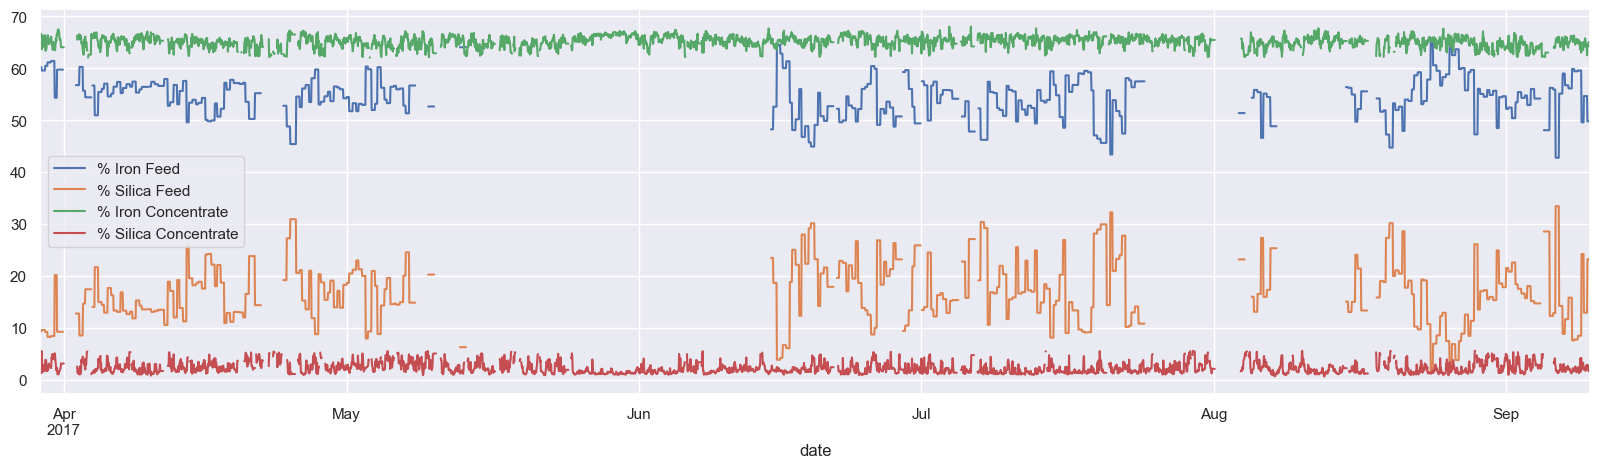

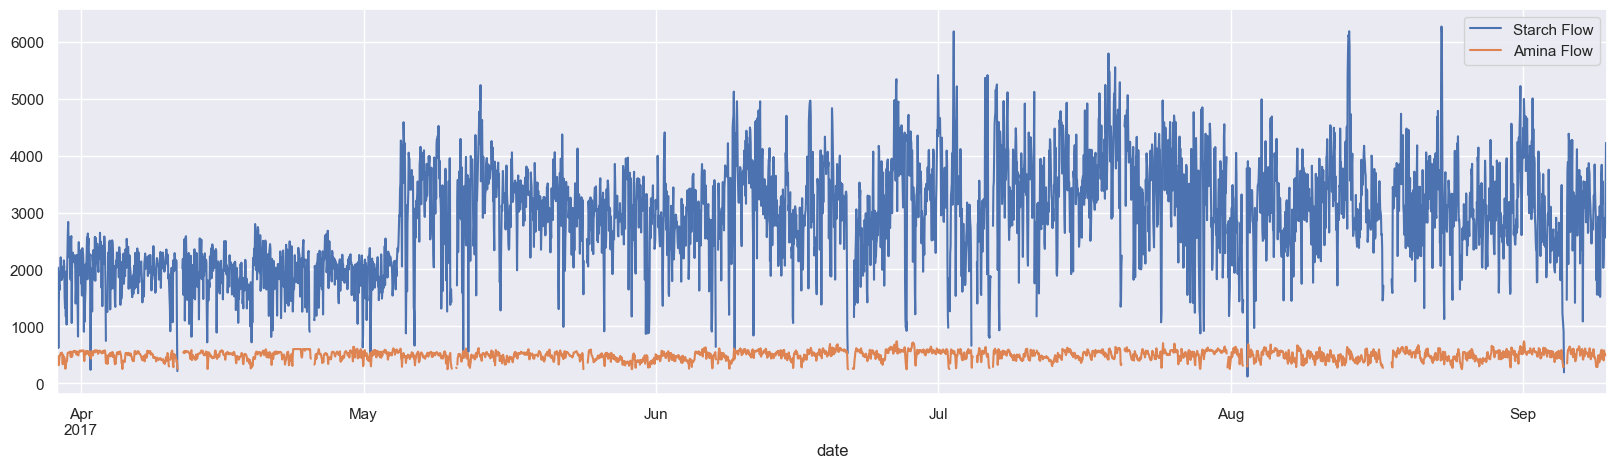

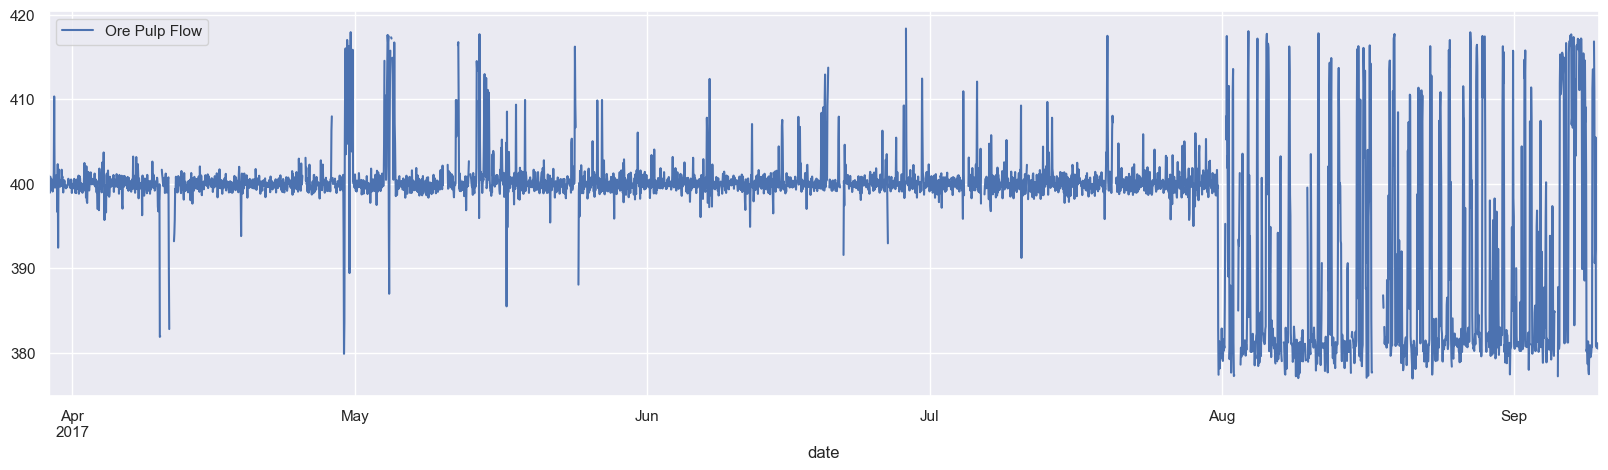

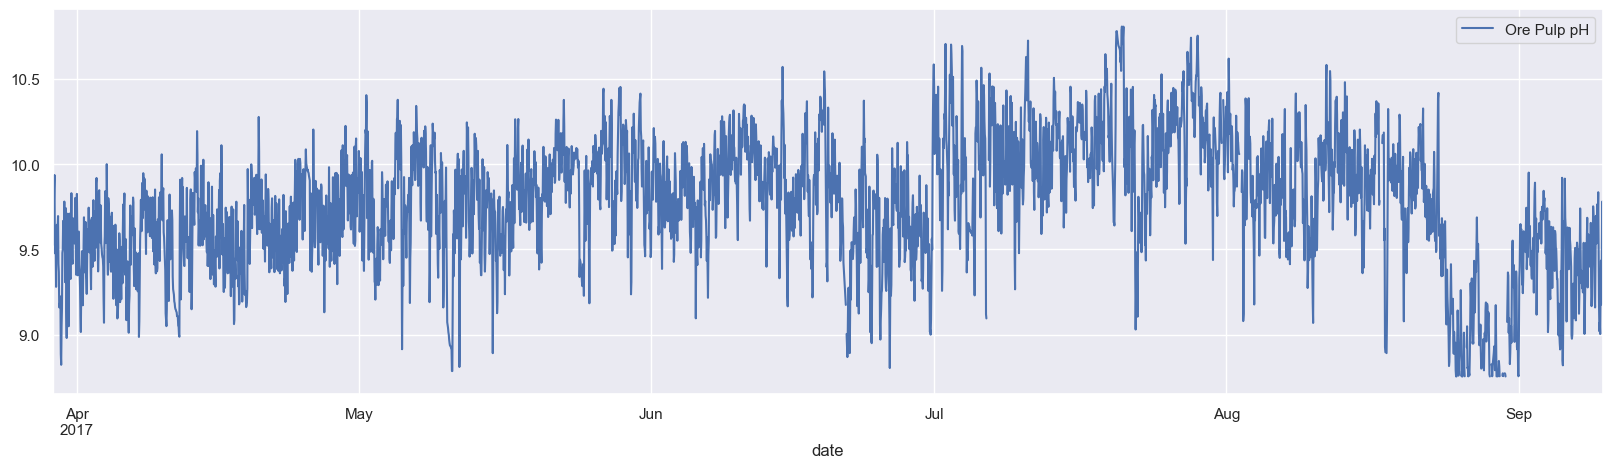

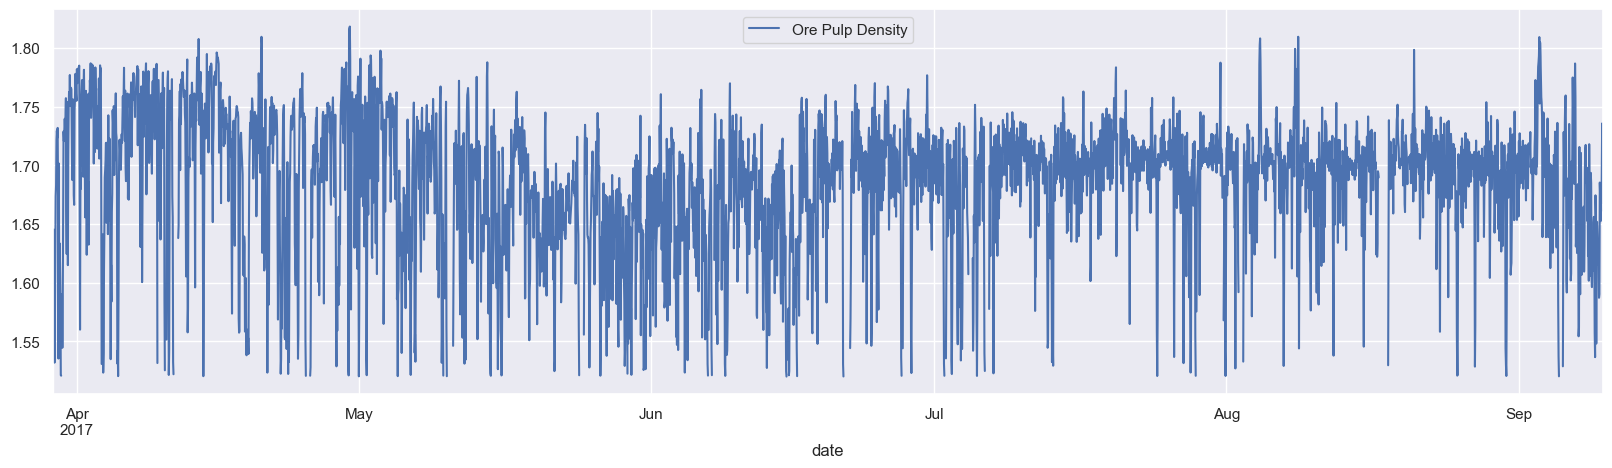

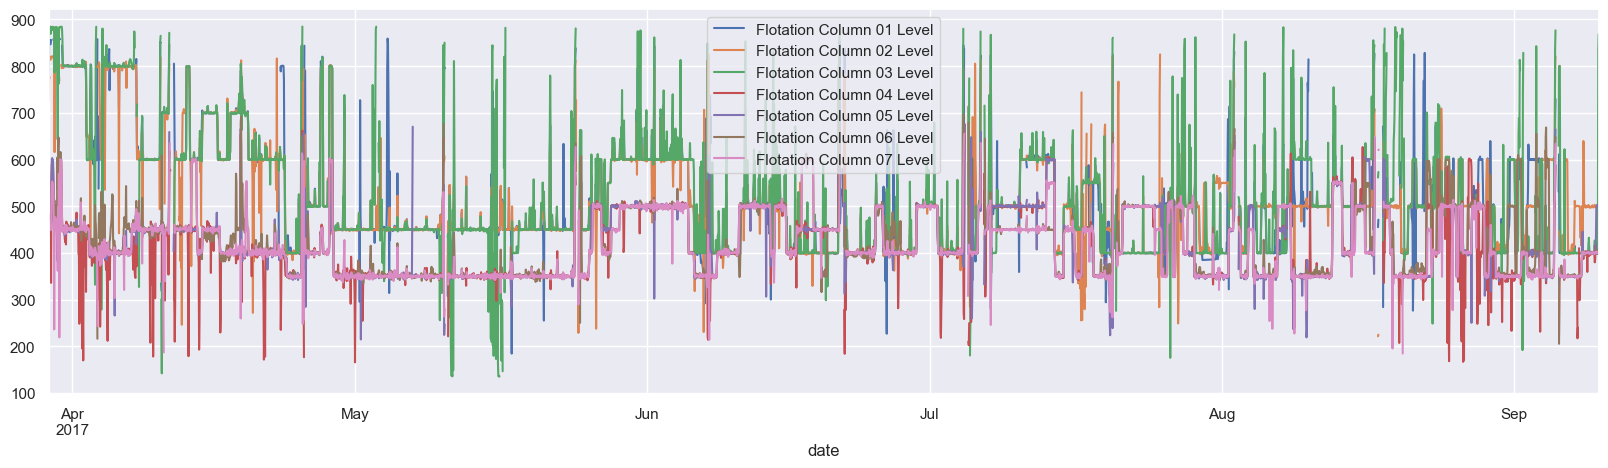

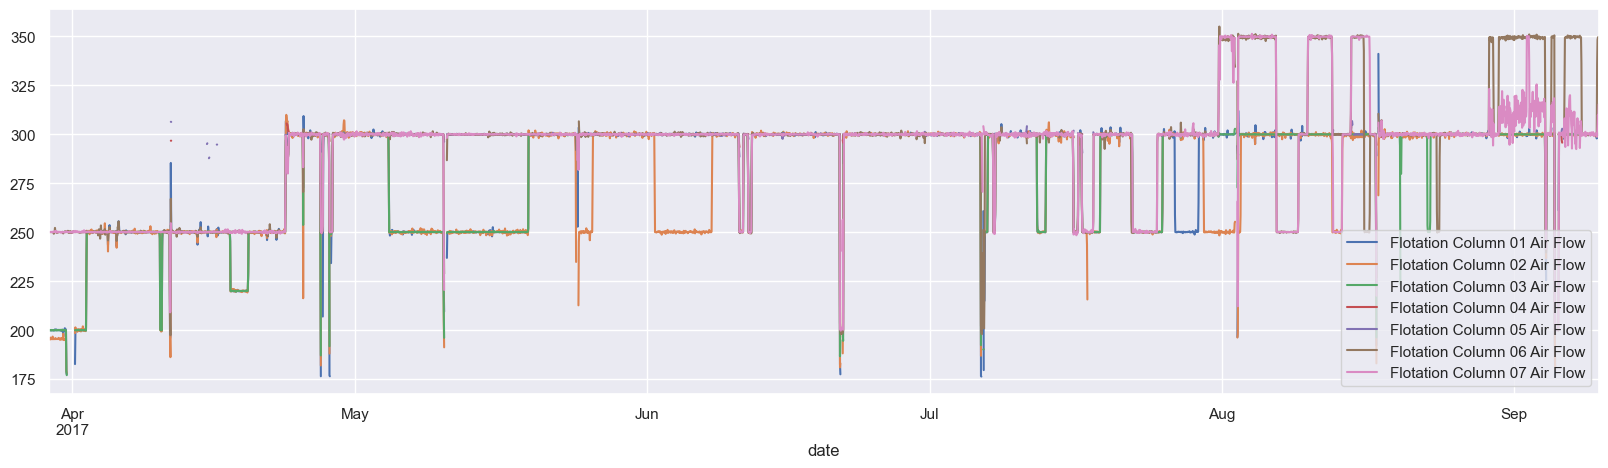

In [27]:
# Visualização gráfica das variáveis na amostragem horária e com filtros
hourly_data[['% Iron Feed', '% Silica Feed', '% Iron Concentrate', '% Silica Concentrate']].plot()
hourly_data[['Starch Flow', 'Amina Flow']].plot()
hourly_data[['Ore Pulp Flow']].plot()
hourly_data[['Ore Pulp pH']].plot()
hourly_data[['Ore Pulp Density']].plot()
hourly_data[[col for col in hourly_data.columns if 'Level' in col]].plot()
hourly_data[[col for col in hourly_data.columns if 'Air Flow' in col]].plot()

In [28]:
# Remove as linhas em que a variável objetivo é nan, pois não faz sentido analisá-las
model_data = hourly_data.copy()
model_data = model_data[model_data['% Silica Concentrate'].notna()]

# Seleção de variáveis para modelo

In [29]:
# Avalia o índice de correlação (R²) entre a variável de interesse as outras variáveis após reamostragem
correlations = model_data.corr()['% Silica Concentrate']
correlations.abs().sort_values(ascending = False)

% Silica Concentrate            1.000000
% Iron Concentrate              0.777544
Flotation Column 04 Level       0.201637
Amina Flow                      0.197743
Flotation Column 05 Level       0.197705
Flotation Column 07 Level       0.170664
Flotation Column 01 Air Flow    0.170051
Flotation Column 03 Air Flow    0.160639
Flotation Column 06 Level       0.137546
Flotation Column 02 Air Flow    0.128351
Ore Pulp pH                     0.113687
Ore Pulp Density                0.086375
Starch Flow                     0.075291
% Silica Feed                   0.041966
Flotation Column 04 Air Flow    0.040763
Flotation Column 07 Air Flow    0.031616
% Iron Feed                     0.021901
Flotation Column 05 Air Flow    0.019231
Flotation Column 03 Level       0.017749
Flotation Column 06 Air Flow    0.012703
Ore Pulp Flow                   0.008613
Flotation Column 01 Level       0.006580
Flotation Column 02 Level       0.002169
Name: % Silica Concentrate, dtype: float64

In [30]:
# Avalia autocorrelação da variável de interesse para diferentes lag times horários
silica_autocorr = pd.Series()
for lag_time in range(1, 25):
    silica_autocorr[lag_time] = hourly_data['% Silica Concentrate'].autocorr(lag = lag_time)
silica_autocorr
# Podemos notar que há uma forte autocorrelação, maior até que as correlações 

1     0.715087
2     0.574372
3     0.485235
4     0.395695
5     0.321926
6     0.276347
7     0.227471
8     0.200500
9     0.183585
10    0.163588
11    0.163918
12    0.161552
13    0.138254
14    0.145571
15    0.152201
16    0.141345
17    0.156654
18    0.154505
19    0.148663
20    0.144431
21    0.164541
22    0.167434
23    0.167178
24    0.199781
dtype: float64

In [31]:
# Cria a variável atrasada para todos os lag times em que a correlação é maior que 0.2
model_data['Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(1)
model_data['2h Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(2) 
model_data['3h Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(3) 
model_data['4h Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(4) 
model_data['5h Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(5)
model_data['6h Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(6)
model_data['7h Previous % Silica Concentrate'] = model_data['% Silica Concentrate'].shift(7)

In [32]:
# Cria as mesmas variáveis atrasadas com os dados brutos para permitir testes dos modelos
raw_data['Previous % Silica Concentrate'] = raw_data['% Silica Concentrate'].shift(180)
raw_data['2h Previous % Silica Concentrate'] = raw_data['% Silica Concentrate'].shift(2*180)
raw_data['3h Previous % Silica Concentrate'] = raw_data['% Silica Concentrate'].shift(3*180)
raw_data['4h Previous % Silica Concentrate'] = raw_data['% Silica Concentrate'].shift(4*180)
raw_data['5h Previous % Silica Concentrate'] = raw_data['% Silica Concentrate'].shift(5*180)
raw_data['6h Previous % Silica Concentrate'] = raw_data['% Silica Concentrate'].shift(6*180)
raw_data['7h Previous % Silica Concentrate'] = raw_data['% Silica Concentrate'].shift(7*180)

# Preparação e treino do modelo

In [33]:
# Cria versão dos dados para modelo substituindo os pontos nan pela média, para permitir maior gama de modelos a serem analisados
model_data_without_na = model_data.copy()
model_data_without_na = model_data_without_na.fillna(model_data_without_na.mean())

In [ ]:
# Separação de features e variável objetivo
# Não faz sentido considerar o dado de ferro do concentrado no modelo, uma vez que ele é complementar ao dado de sílica

selected_features = {}

# Chute inicial: todas as variáveis, sem dados atrasados
selected_features[1] = [var for var in model_data.columns if var not in  ['% Silica Concentrate', '% Iron Concentrate'] and 'Previous' not in var]

# Teste da adição da variável temporal com 1h de atraso
selected_features[2] = selected_features[1] + ['Previous % Silica Concentrate']

# Teste da adição de todas as variáveis temporais criadas
selected_features[3] = [var for var in model_data.columns if var not in  ['% Silica Concentrate', '% Iron Concentrate']]

# Teste RFECV linreg (erro mínimo e r2 tiveram mesmo resultado)
selected_features[4] = ['Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 04 Air Flow', 'Previous % Silica Concentrate',
                        '2h Previous % Silica Concentrate', '3h Previous % Silica Concentrate']

# Teste RFECV RandomForest (erro mínimo)
selected_features[5] = ['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Flotation Column 02 Air Flow',
                        'Flotation Column 03 Air Flow', 'Flotation Column 03 Level', 'Flotation Column 05 Level',
                        'Previous % Silica Concentrate', '2h Previous % Silica Concentrate', '3h Previous % Silica Concentrate',
                        '7h Previous % Silica Concentrate']

# Teste RFECV RandomForest (r2)
selected_features[6] = ['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Flotation Column 02 Air Flow',
                        'Flotation Column 03 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 07 Air Flow',
                        'Flotation Column 03 Level', 'Flotation Column 04 Level', '% Iron Feed', 'Previous % Silica Concentrate',
                        '2h Previous % Silica Concentrate', '3h Previous % Silica Concentrate', '7h Previous % Silica Concentrate']

# Teste RFECV nas variáveis restantes do melhor modelo (RFECV linreg)
selected_features[7] = ['Ore Pulp pH', 'Ore Pulp Density', 'Previous % Silica Concentrate',
                        '2h Previous % Silica Concentrate', '3h Previous % Silica Concentrate']

# Melhor modelo RF com set de features #7

set_to_use = 7 # Permite a seleção do set de features colocado acima para facilitar novos testes

X = model_data[selected_features[set_to_use]]
y = model_data['% Silica Concentrate']

X_wihtout_na = model_data_without_na[selected_features[set_to_use]]
y_without_na = model_data_without_na['% Silica Concentrate']

In [35]:
# Determinação da quantidade de linhas da amostra de treino, considerando 80% do total
# Não foi utilizada uma abordagem randômica de separação, para respeitar a temporalidade dos dados
total_sample_size = model_data.shape[0]
train_size = round(total_sample_size*0.8)
train_size

2828

In [36]:
# Separação das amostras de treino e teste
X_train = X.iloc[0:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:]

X_train_wihtout_na = X_wihtout_na.iloc[0:train_size]
X_test_wihtout_na = X_wihtout_na.iloc[train_size:]

y_train_wihtout_na = y_without_na.iloc[0:train_size]
y_test_wihtout_na = y_without_na.iloc[train_size:]

### Linear Regression

In [37]:
# Para o primeiro modelo, vamos treinar uma regressão linear, abordagem mais simples de tentativa de predição
# Esse tipo de modelo não permite a utilização de dados nan, então será utilizado o dataset sem eles
linreg_model = LinearRegression()
linreg_model.fit(X_train_wihtout_na, y_train_wihtout_na)

LinearRegression()

In [38]:
# Calcula a predição do modelo nos dados de teste
linreg_prediction = linreg_model.predict(X_test_wihtout_na)
linreg_prediction = pd.Series(linreg_prediction, index = y_test_wihtout_na.index)

In [39]:
# Avalia a performance do modelo nos dados de teste
true_data = y_test_wihtout_na
pred_data = linreg_prediction

print('Mean Squared Error (MSE):', metrics.mean_squared_error(true_data, pred_data))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(true_data, pred_data))
print('R^2:', metrics.r2_score(true_data, pred_data))

Mean Squared Error (MSE): 0.521266707324109
Root Mean Squared Error (RMSE): 0.521266707324109
R^2: 0.5383657521808645


<Axes: xlabel='date'>

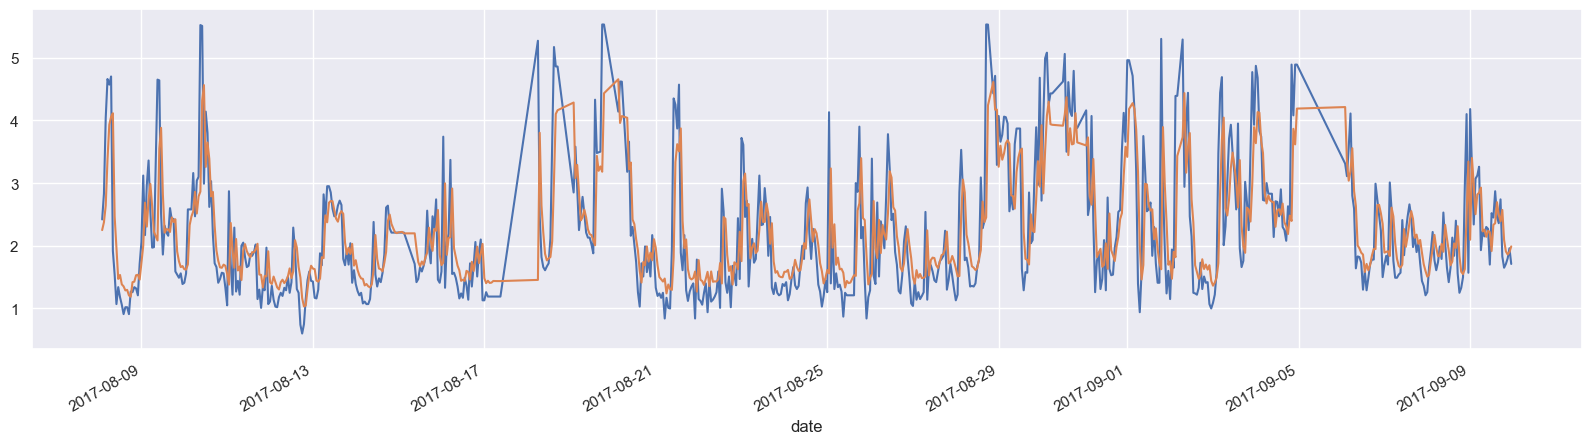

In [40]:
# Plota os dados de teste reais vs. previsão do modelo nos dados de teste
y_test_wihtout_na.plot()
linreg_prediction.plot()

In [41]:
# Calcula predição para os dados brutos, removendo os nan
linreg_full_data_prediction = linreg_model.predict(raw_data[selected_features[set_to_use]].fillna(raw_data[selected_features[set_to_use]].mean()))
linreg_full_data_prediction = pd.Series(linreg_full_data_prediction, index = raw_data.index)

In [42]:
# Avalia a performance do modelo nos dados brutos
true_data = raw_data['% Silica Concentrate']
pred_data = linreg_full_data_prediction

print('Mean Squared Error (MSE):', metrics.mean_squared_error(true_data, pred_data))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(true_data, pred_data))
print('R^2:', metrics.r2_score(true_data, pred_data))

Mean Squared Error (MSE): 0.49345226867517594
Root Mean Squared Error (RMSE): 0.49345226867517594
R^2: 0.6104946921706426


<Axes: >

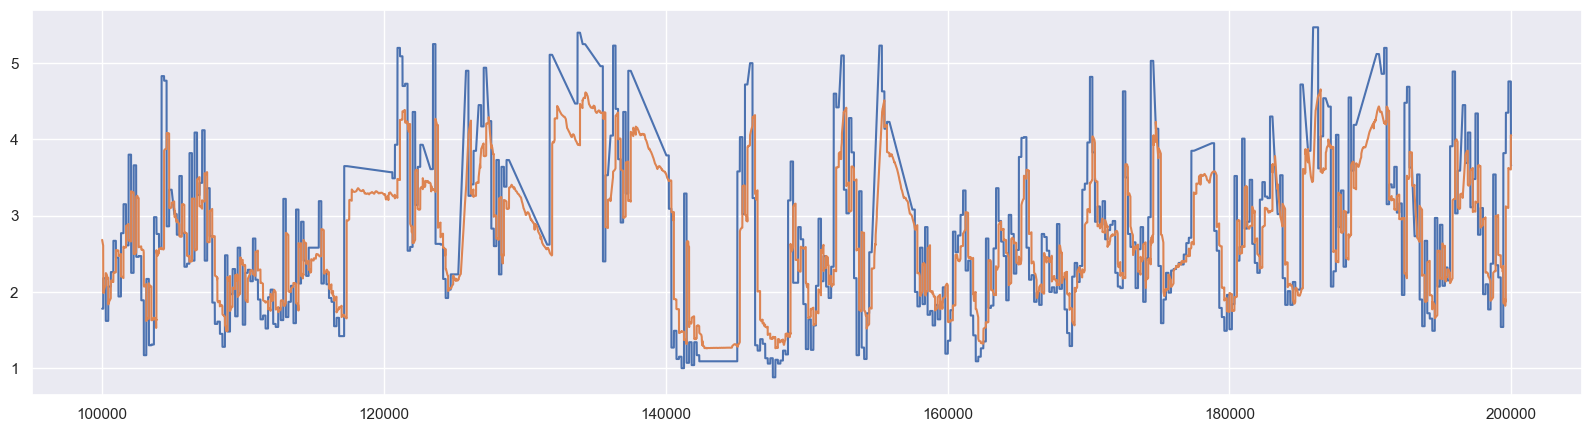

In [43]:
# Plota os dados reais vs. previsão do modelo nos dados brutos
raw_data['% Silica Concentrate'].iloc[100000:200000].plot()
linreg_full_data_prediction.iloc[100000:200000].plot()

### Random Forest

In [44]:
# O segundo modelo testado é um RandomForest, que já é capaz de aceitar dados nan
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
# Calcula a predição do modelo nos dados de teste
rf_prediction = rf_model.predict(X_test)
rf_prediction = pd.Series(rf_prediction, index = y_test.index)

In [46]:
# Avalia a performance do modelo nos dados de teste
true_data = y_test
pred_data = rf_prediction

print('Mean Squared Error (MSE):', metrics.mean_squared_error(true_data, pred_data))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(true_data, pred_data))
print('R^2:', metrics.r2_score(true_data, pred_data))

Mean Squared Error (MSE): 0.5894622136656684
Root Mean Squared Error (RMSE): 0.5894622136656684
R^2: 0.47797175265567193


<Axes: xlabel='date'>

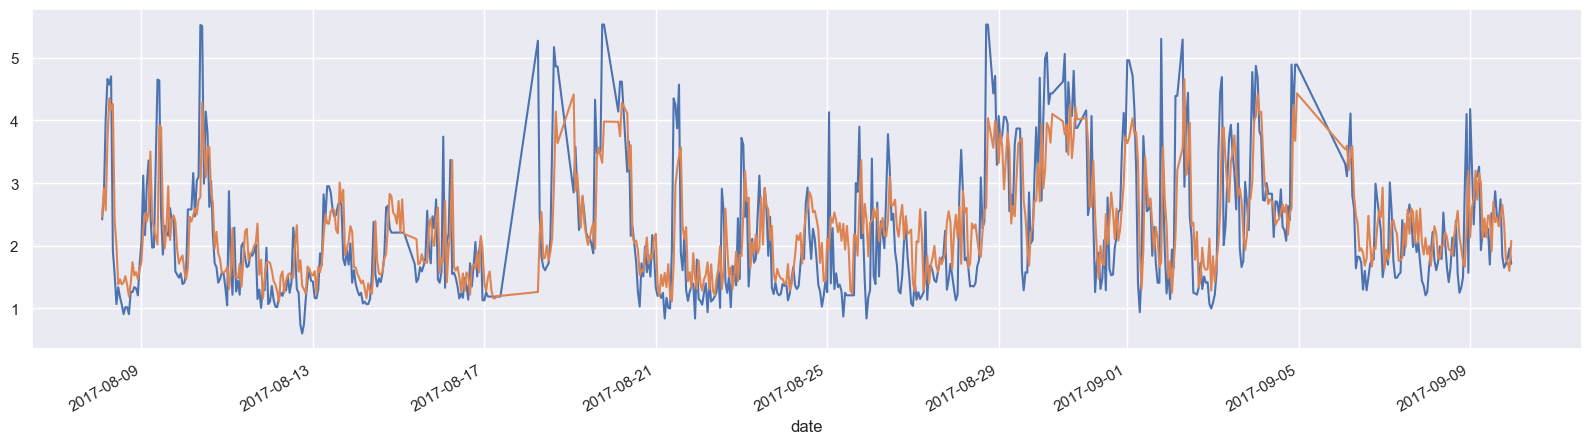

In [47]:
# Plota os dados de teste reais vs. previsão do modelo nos dados de teste
y_test.plot()
rf_prediction.plot()

In [48]:
# Calcula predição para os dados brutos (sem tratamento)
rf_full_data_prediction = rf_model.predict(raw_data[selected_features[set_to_use]])
rf_full_data_prediction = pd.Series(rf_full_data_prediction, index = raw_data.index)

In [49]:
# Avalia a performance do modelo nos dados brutos
true_data = raw_data['% Silica Concentrate']
pred_data = rf_full_data_prediction

print('Mean Squared Error (MSE):', metrics.mean_squared_error(true_data, pred_data))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(true_data, pred_data))
print('R^2:', metrics.r2_score(true_data, pred_data))

Mean Squared Error (MSE): 0.33580773747035036
Root Mean Squared Error (RMSE): 0.33580773747035036
R^2: 0.7349310065874484


<Axes: >

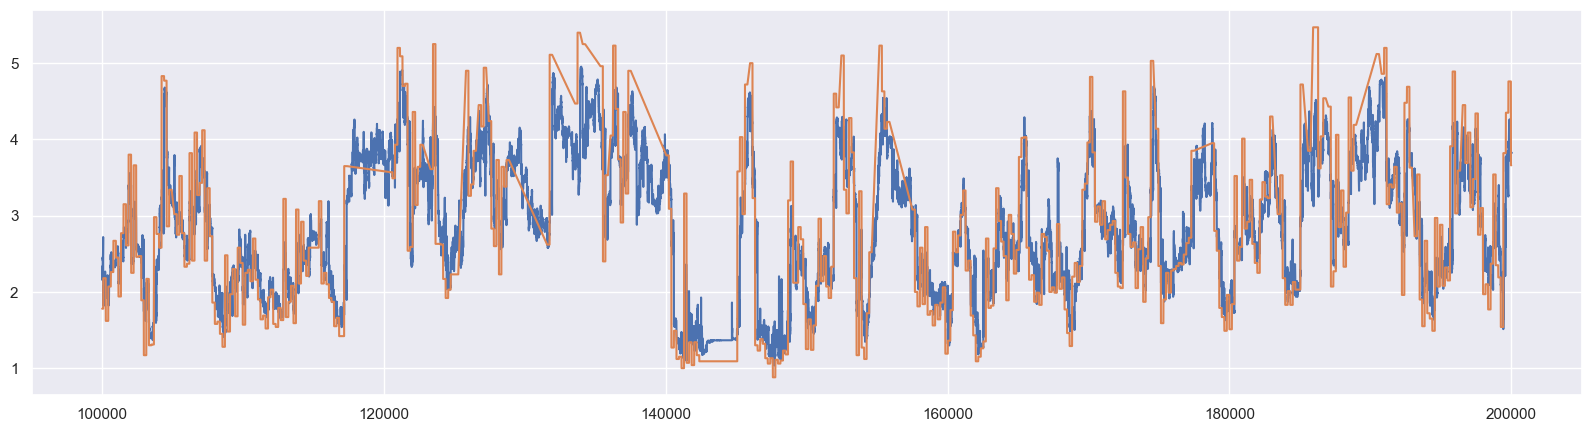

In [50]:
# Plota os dados reais vs. previsão do modelo nos dados brutos
rf_full_data_prediction.iloc[100000:200000].plot()
raw_data['% Silica Concentrate'].iloc[100000:200000].plot()

### Gradient Boosting

In [51]:
# O terceiro modelo testado é um GradientBoosting, que já é capaz de aceitar dados nan
hgb_model = HistGradientBoostingRegressor()
hgb_model.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [52]:
# Calcula a predição do modelo nos dados de teste
hgb_prediction = hgb_model.predict(X_test)
hgb_y_prediction = pd.Series(hgb_prediction, index = y_test.index)

In [53]:
# Avalia a performance do modelo nos dados de teste
true_data = y_test
pred_data = hgb_y_prediction

print('Mean Squared Error (MSE):', metrics.mean_squared_error(true_data, pred_data))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(true_data, pred_data))
print('R^2:', metrics.r2_score(true_data, pred_data))

Mean Squared Error (MSE): 0.581854220027298
Root Mean Squared Error (RMSE): 0.581854220027298
R^2: 0.48470939841611405


<Axes: xlabel='date'>

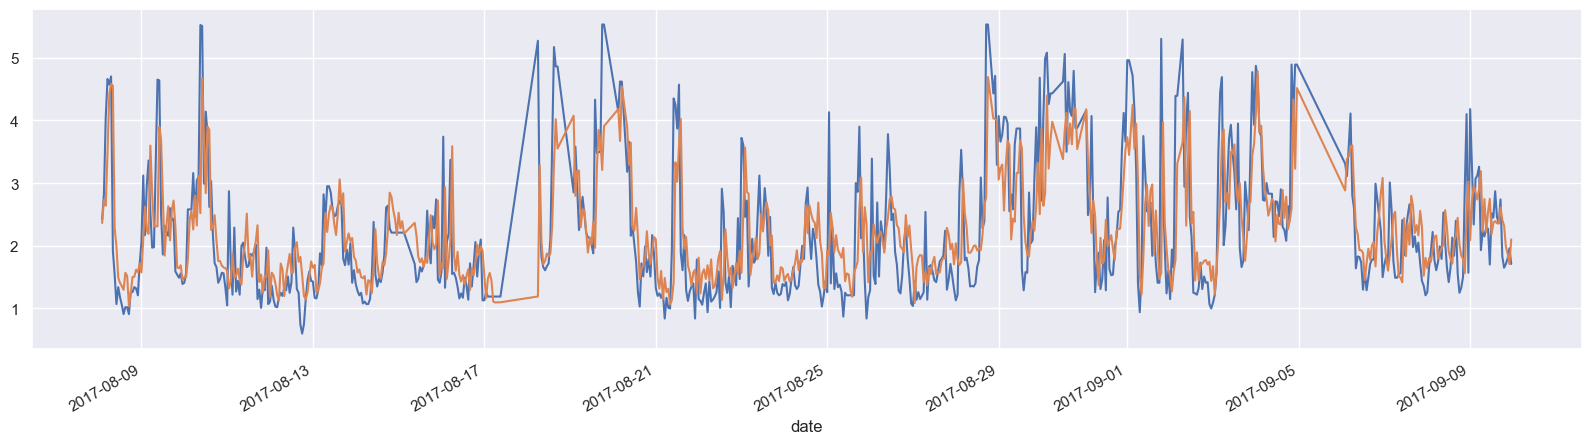

In [54]:
# Plota os dados de teste reais vs. previsão do modelo nos dados de teste
y_test.plot()
hgb_y_prediction.plot()

In [55]:
# Calcula previção para os dados brutos (sem tratamento)
hgb_full_data_prediction = hgb_model.predict(raw_data[selected_features[set_to_use]])
hgb_full_data_prediction = pd.Series(hgb_full_data_prediction, index = raw_data.index)

In [56]:
# Avalia a performance do modelo nos dados brutos
true_data = raw_data['% Silica Concentrate']
pred_data = hgb_full_data_prediction

print('Mean Squared Error (MSE):', metrics.mean_squared_error(true_data, pred_data))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(true_data, pred_data))
print('R^2:', metrics.r2_score(true_data, pred_data))

Mean Squared Error (MSE): 0.4248393098840295
Root Mean Squared Error (RMSE): 0.4248393098840295
R^2: 0.6646541587119157


<Axes: >

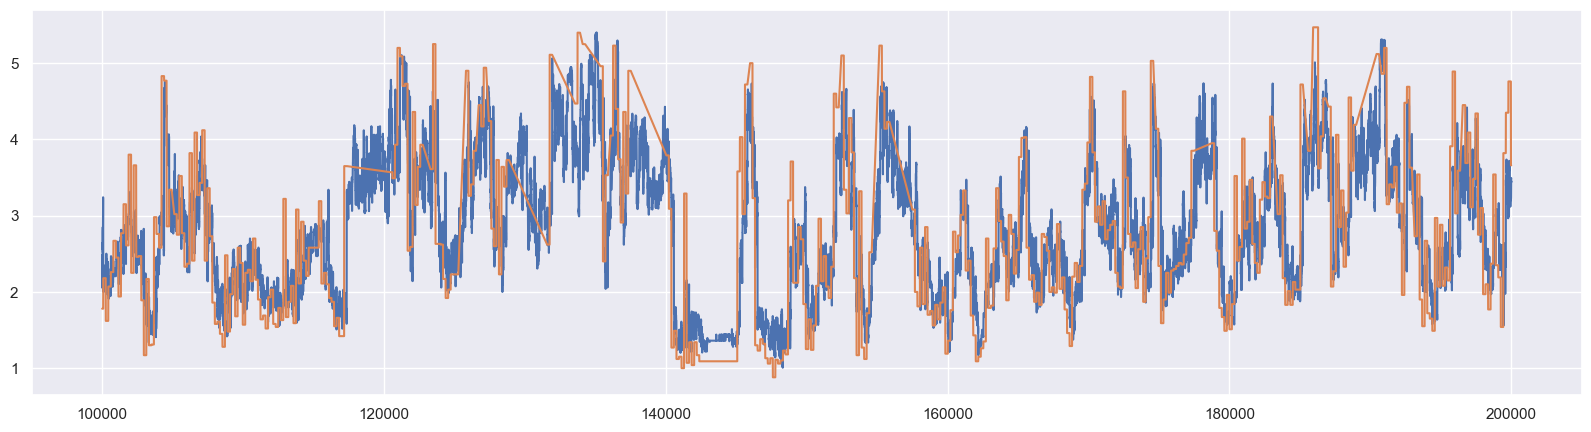

In [57]:
hgb_full_data_prediction.iloc[100000:200000].plot()
raw_data['% Silica Concentrate'].iloc[100000:200000].plot()

# Testes com feature selection

In [58]:
# Avaliação dos coeficientes da regressão linear
coefs = pd.Series(linreg_model.coef_, index = X_train.columns)
coefs.sort_values(ascending = False)

Previous % Silica Concentrate       0.584421
Ore Pulp Density                    0.501934
2h Previous % Silica Concentrate    0.112932
3h Previous % Silica Concentrate    0.066154
Ore Pulp pH                        -0.064632
dtype: float64

In [59]:
# Importância baseada em impureza média para RandomForest
imps = pd.Series(rf_model.feature_importances_, index = X_train.columns)
imps.sort_values(ascending = False)

Previous % Silica Concentrate       0.587594
2h Previous % Silica Concentrate    0.115527
Ore Pulp Density                    0.104867
Ore Pulp pH                         0.098722
3h Previous % Silica Concentrate    0.093291
dtype: float64

In [60]:
# Importância baseada em permutação para RandomForest
importance = permutation_importance(rf_model, X_test, y_test, scoring= ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'], n_repeats = 10, random_state = 42, n_jobs = 2)

In [61]:
mse = pd.Series(importance['neg_mean_squared_error']['importances_mean'], index = X_train.columns)
mse.sort_values(ascending = False)

Previous % Silica Concentrate       0.657404
2h Previous % Silica Concentrate    0.118351
3h Previous % Silica Concentrate    0.038219
Ore Pulp Density                    0.004962
Ore Pulp pH                        -0.006910
dtype: float64

In [62]:
rmse = pd.Series(importance['neg_root_mean_squared_error']['importances_mean'], index = X_train.columns)
rmse.sort_values(ascending = False)

Previous % Silica Concentrate       0.348697
2h Previous % Silica Concentrate    0.073488
3h Previous % Silica Concentrate    0.024454
Ore Pulp Density                    0.003217
Ore Pulp pH                        -0.004554
dtype: float64

In [63]:
r2 = pd.Series(importance['r2']['importances_mean'], index = X_train.columns)
r2.sort_values(ascending = False)

Previous % Silica Concentrate       0.582197
2h Previous % Silica Concentrate    0.104812
3h Previous % Silica Concentrate    0.033846
Ore Pulp Density                    0.004395
Ore Pulp pH                        -0.006120
dtype: float64

In [64]:
# # Análise de eliminação recursiva para modelo de regressão
# rfe_linreg = RFECV(estimator = linreg_model, scoring = 'r2')
# X_new_linreg = rfe_linreg.fit_transform(X_wihtout_na, y_without_na)
# X_new_linreg

In [65]:
# X.columns[rfe_linreg.support_]
# # 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 04 Air Flow',
# #        'Previous % Silica Concentrate', '2h Previous % Silica Concentrate',
# #        '3h Previous % Silica Concentrate'

In [66]:
# # Análise de eliminação recursiva para modelo de regressão
# rfe_linreg = RFECV(estimator = linreg_model, scoring = 'neg_mean_squared_error')
# X_new_linreg = rfe_linreg.fit_transform(X_wihtout_na, y_without_na)
# X_new_linreg

In [67]:
# X.columns[rfe_linreg.support_]
# # 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 04 Air Flow',
# #        'Previous % Silica Concentrate', '2h Previous % Silica Concentrate',
# #        '3h Previous % Silica Concentrate'

In [68]:
# # Análise de eliminação recursiva para modelo RandomForest
# rfe_rf = RFECV(estimator = rf_model, scoring = 'r2')
# X_new_rf = rfe_rf.fit_transform(X, y)
# X_new_rf

In [69]:
# X.columns[rfe_rf.support_]
# # 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH',
# #        'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
# #        'Flotation Column 05 Air Flow', 'Flotation Column 07 Air Flow',
# #        'Flotation Column 03 Level', 'Flotation Column 04 Level', '% Iron Feed',
# #        'Previous % Silica Concentrate', '2h Previous % Silica Concentrate',
# #        '3h Previous % Silica Concentrate', '7h Previous % Silica Concentrate'

In [70]:
# # Análise de eliminação recursiva para modelo RandomForest
# rfe_rf = RFECV(estimator = rf_model, scoring = 'neg_mean_squared_error')
# X_new_rf = rfe_rf.fit_transform(X, y)
# X_new_rf

In [71]:
# X.columns[rfe_rf.support_]
# # 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH',
# #        'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
# #        'Flotation Column 03 Level', 'Flotation Column 05 Level',
# #        'Previous % Silica Concentrate', '2h Previous % Silica Concentrate',
# #        '3h Previous % Silica Concentrate', '7h Previous % Silica Concentrate'

# Preparação apresentação

In [72]:
# Faz uma cópia do dataset com os dados brutos para plotagem dos gráficos
raw_data_with_date = raw_data.copy()
raw_data_with_date = raw_data_with_date.set_index('date')
raw_data_with_date.index = pd.to_datetime(raw_data_with_date.index)
raw_data_with_date = raw_data_with_date[raw_data_with_date.index >= '2017-03-29']

In [73]:
# Define caminho para exportação das figuras
figures_path = 'figures/'

In [74]:
print(sns.color_palette().as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


C:\Users\matle\AppData\Local\Temp\ipykernel_20012\4188658360.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(figures_path + 'Comportamento das Concentrações (Geral).png', bbox_inches = 'tight')
c:\Users\matle\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


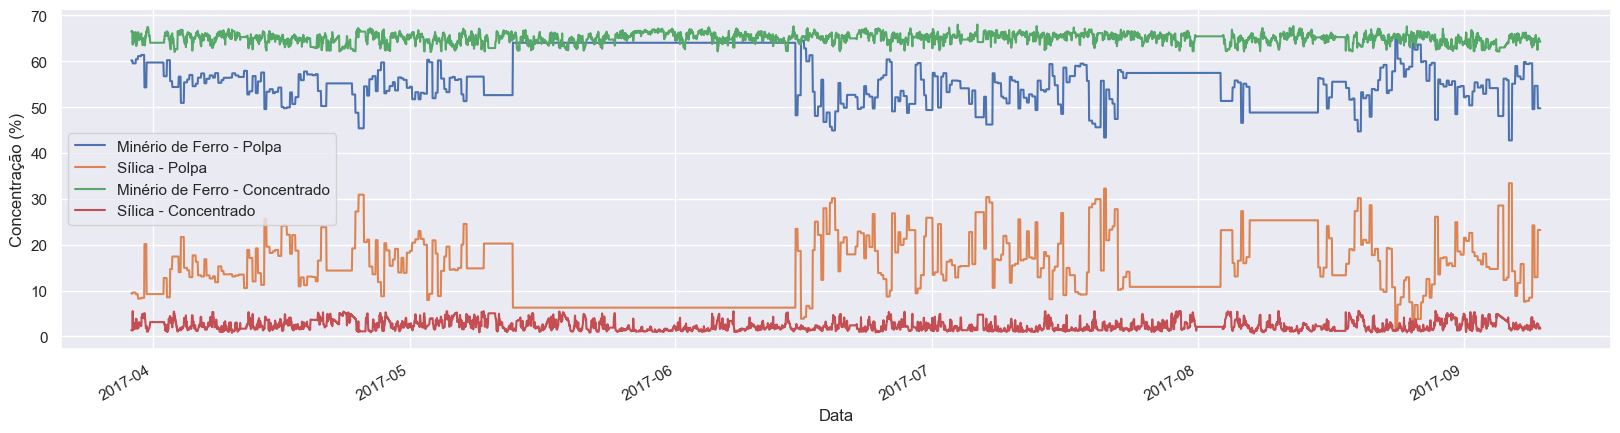

In [75]:
# Comportamento das concentrações em todo o período
legend = dict(zip(['% Iron Feed', '% Silica Feed', '% Iron Concentrate', '% Silica Concentrate'],
                  ['Minério de Ferro - Polpa', 'Sílica - Polpa', 'Minério de Ferro - Concentrado', 'Sílica - Concentrado']))

ax = raw_data_with_date[[column for column in raw_data.columns if ('%' in column) and ('Previous' not in column)]].plot()
plt.ylabel('Concentração (%)')
plt.xlabel('Data')
handles, previous_labels = ax.get_legend_handles_labels()
new_labels = [legend[label] for label in previous_labels]
ax.legend(handles = handles, labels = new_labels)
plt.savefig(figures_path + 'Comportamento das Concentrações (Geral).png', bbox_inches = 'tight')

C:\Users\matle\AppData\Local\Temp\ipykernel_20012\1661890602.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(raw_data_with_date.index[[i for i in range(frame_start, frame_end + 2000, 2000)]].strftime('%d/%m %H:%M'))


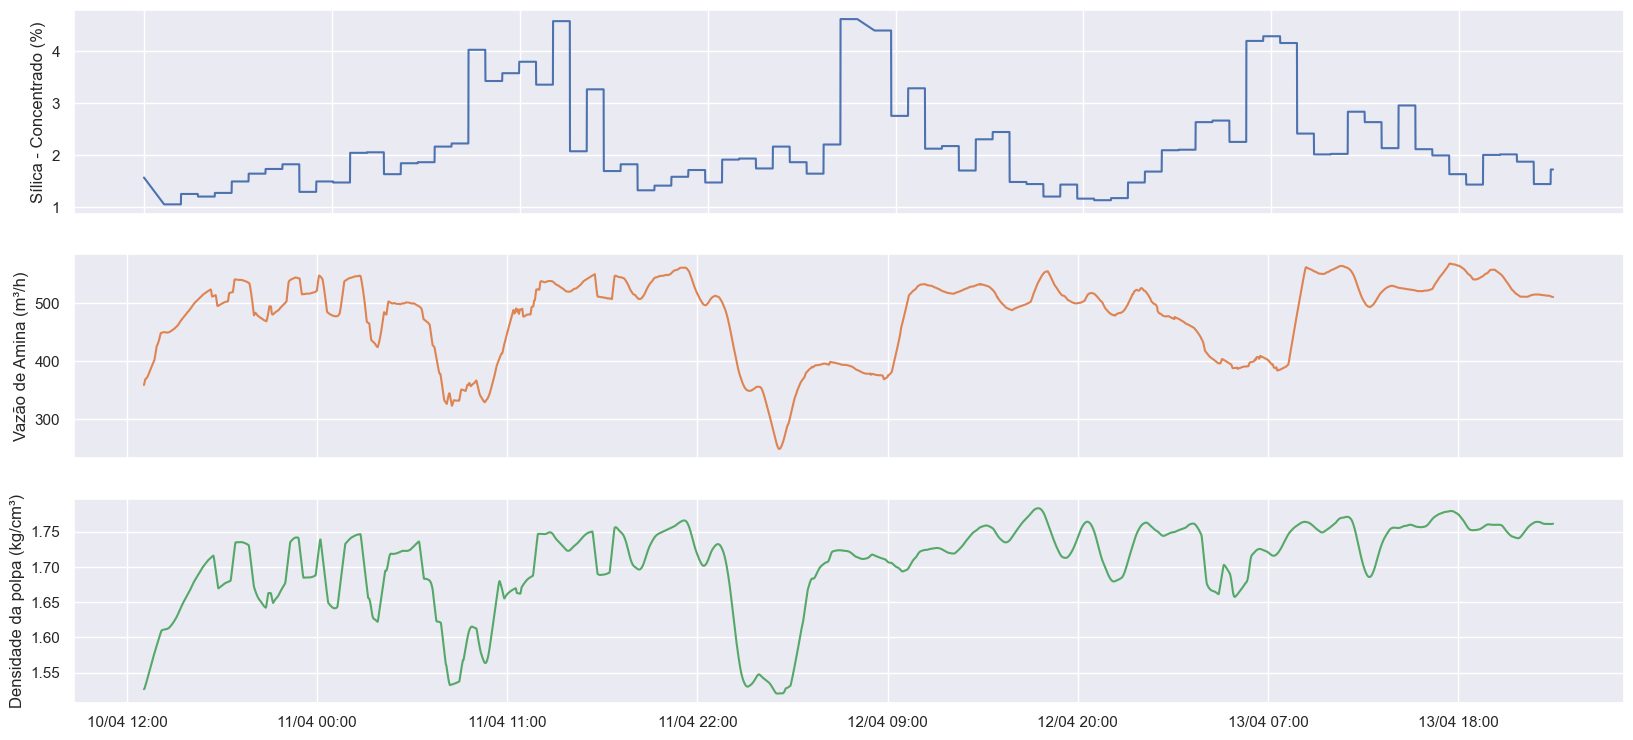

In [76]:
# Comportamento da concentração de sílica final vs. vazão de amina vs. densidade
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (20, 9))

frame_start = 50000
frame_end = 65000

ax1.plot(raw_data['% Silica Concentrate'].iloc[frame_start:frame_end])
ax2.plot(raw_data['Amina Flow'].iloc[frame_start:frame_end].rolling(180).mean(), color = '#dd8452')
ax3.plot(raw_data['Ore Pulp Density'].iloc[frame_start:frame_end].rolling(180).mean(), color = '#55a868')

ax1.set_ylabel('Sílica - Concentrado (%)')
ax2.set_ylabel('Vazão de Amina (m³/h)')
ax3.set_ylabel('Densidade da polpa (kg/cm³)')

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels(raw_data_with_date.index[[i for i in range(frame_start, frame_end + 2000, 2000)]].strftime('%d/%m %H:%M'))

plt.savefig(figures_path + 'Comportamento Sílica x Amina x Densidade.png', bbox_inches = 'tight')

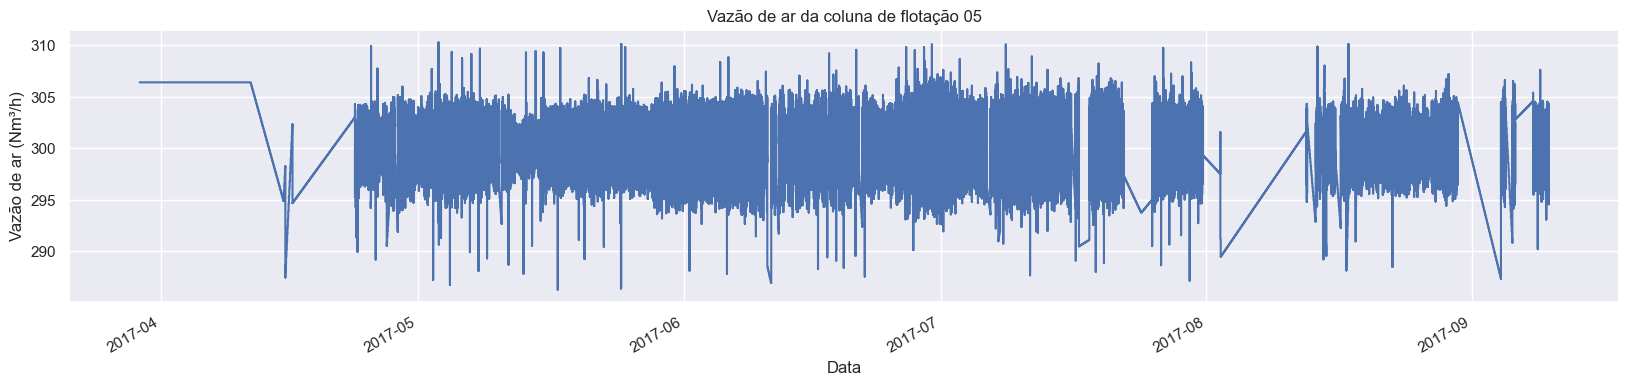

In [77]:
# Comportamento das concentrações em todo o período
ax = raw_data_with_date['Flotation Column 05 Air Flow'].plot(figsize = (20, 4))
plt.title('Vazão de ar da coluna de flotação 05')
plt.ylabel('Vazão de ar (Nm³/h)')
plt.xlabel('Data')
plt.savefig(figures_path + 'Comportamento Nível de Ar.png', bbox_inches = 'tight')